In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report


## Problem Statement
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

### About the dataset

Variable	Description
- Loan_ID :  Unique Loan ID
- Gender : Male/ Female
- Married : Applicant married (Y/N)
- Dependents : Number of dependents
- Education : Applicant Education (Graduate/ Under Graduate)
- Self_Employed : Self employed (Y/N)
- ApplicantIncome : Applicant income
- CoapplicantIncome : Coapplicant income
- LoanAmount : Loan amount in thousands
- Loan_Amount_Term : Term of loan in months
- Credit_History : credit history meets guidelines
- Property_Area	: Urban/ Semi Urban/ Rural
- Loan_Status : (Target) Loan approved (Y/N)

In [5]:
train_data = pd.read_csv("C:\\Users\\sachi\\Downloads\\train_ctrUa4K.csv")

In [6]:
test_data = pd.read_csv("C:\\Users\\sachi\\Downloads\\test_lAUu6dG.csv")

# Data Pre-processing on Train data

In [8]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train_data.shape

(614, 13)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- Numerical columns : ApplicantIncome, CoapplicantIncome, LoanAmount,  Loan_Amount_Term
- Categorical columns : Loan_ID, Gender, Married , Dependents, Education, Self_Employed , Credit_History, Property_Area, Loan_Status

In [12]:
train_data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
train_data["Credit_History"].unique()

array([ 1.,  0., nan])

In [14]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Duplicate Removal

In [16]:
train_data.duplicated().sum()          #checking duplicated rows

0

In [17]:
train_data.columns.duplicated().sum()   #checking duplicated rows

0

### Handling missing values

In [19]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
train_data.isna().sum()/train_data.shape[0]*100 # missing values in percentage

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [21]:
# splitting Numerical and Categorical Columns
train_num_df = train_data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]] # numerical columns
train_cat_df = train_data[["Loan_ID","Gender", "Married" , "Dependents", "Education", "Self_Employed" , "Credit_History", "Property_Area", "Loan_Status"]] # categorical columns

In [22]:
print ("Numerical columns are")
num_cols = train_num_df.columns.tolist()
print(num_cols)

Numerical columns are
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [23]:
print ("Categorical columns are")
cat_cols = train_cat_df.columns.tolist()
print(cat_cols)

Categorical columns are
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']


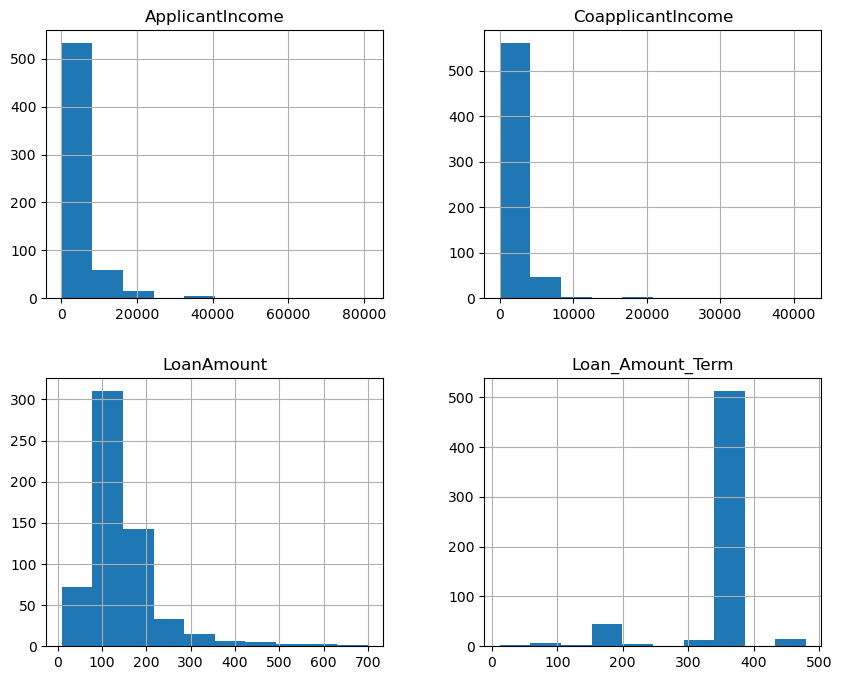

In [24]:
train_num_df.hist(figsize =(10,8))
plt.show()

In [25]:
#Filling missing values for numerical columns
for col in num_cols:                                
    train_num_df[col] = train_num_df[col].fillna(train_num_df[col].median())

In [26]:
train_num_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [27]:
#Filling missing values for categorical columns
for col in cat_cols:                                
    train_cat_df[col] = train_cat_df[col].fillna(train_cat_df[col].mode()[0])


In [28]:
train_cat_df.isna().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

### Encoding Categorical Variables

In [30]:
train_cat_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y


In [31]:
label_enc = LabelEncoder()
label_columns = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Credit_History","Loan_Status"]
for col in label_columns:
    train_cat_df[col] = label_enc.fit_transform(train_cat_df[col])

In [32]:
train_cat_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,1,2,1
1,LP001003,1,1,1,0,0,1,0,0
2,LP001005,1,1,0,0,1,1,2,1
3,LP001006,1,1,0,1,0,1,2,1
4,LP001008,1,0,0,0,0,1,2,1


In [33]:
train_cat_df.dtypes

Loan_ID           object
Gender             int32
Married            int32
Dependents         int32
Education          int32
Self_Employed      int32
Credit_History     int64
Property_Area      int32
Loan_Status        int32
dtype: object

### Outlier Handling

In [35]:
train_num_df.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0


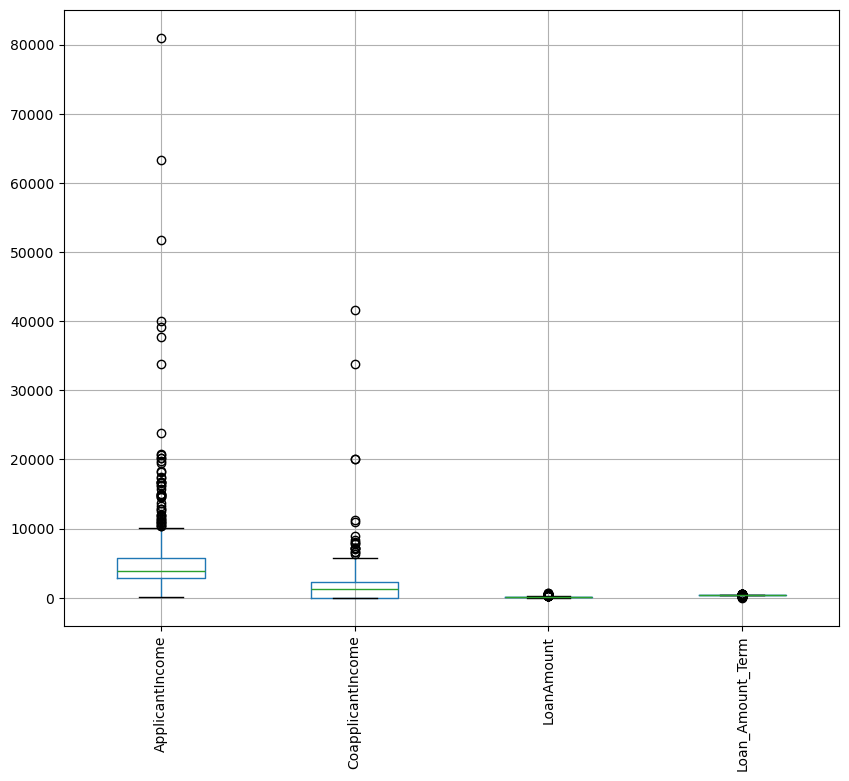

In [36]:
train_num_df.boxplot(figsize=(10,8))
plt.xticks(rotation = 90)
plt.show()

In [37]:
def remove_outliers(train_num_df, column_name):
    q1 = train_num_df[column_name].quantile(0.25)
    q3 = train_num_df[column_name].quantile(0.75)
    iqr = q3- q1
    upper_bound =q3+1.5*iqr
    lower_bound =q1-1.5*iqr
    train_num_df[column_name] = train_num_df [column_name].clip(upper = upper_bound)
    train_num_df[column_name] = train_num_df [column_name].clip(lower = lower_bound)
    return train_num_df[column_name]
for col in num_cols:
    train_num_df[col] = remove_outliers(train_num_df, col)


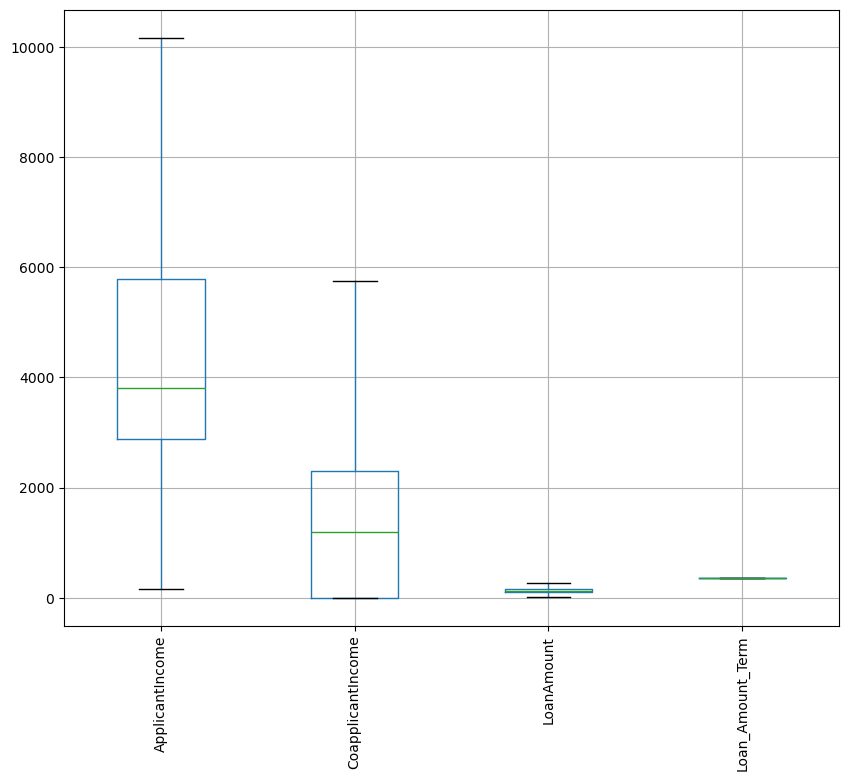

In [38]:
train_num_df.boxplot(figsize=(10,8))
plt.xticks(rotation = 90)
plt.show()

### Scaling Numerical Variables

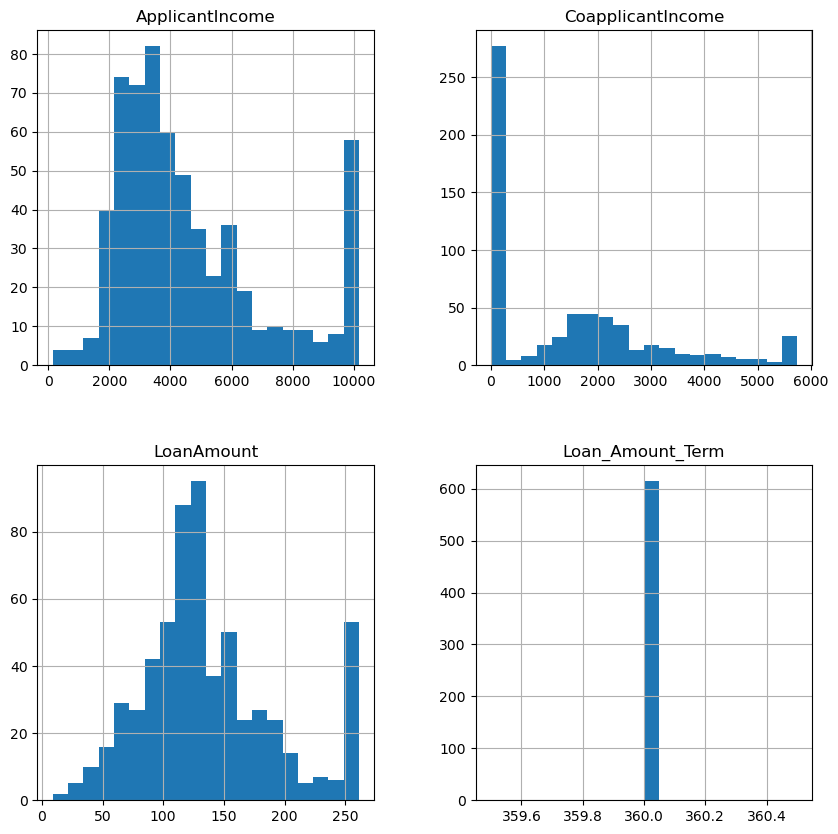

In [40]:
train_num_df.hist(bins=20, figsize= (10,10))
plt.show()

In [41]:
# Identify columns to scale
right_skewed_cols = ["ApplicantIncome", "CoapplicantIncome"]
symmetric_cols = ["LoanAmount"]
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply log transformation for skewed columns to reduce skewness
for col in right_skewed_cols:
    train_num_df[col] = np.log1p(train_num_df[col])

# Apply MinMaxScaler for skewed columns
train_num_df[right_skewed_cols] = min_max_scaler.fit_transform(train_num_df[right_skewed_cols])

# Apply StandardScaler for symmetric columns
train_num_df[symmetric_cols] = standard_scaler.fit_transform(train_num_df[symmetric_cols])

print("Scaling complete. Scaled data:")
print(train_num_df.head())


Scaling complete. Scaled data:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0         0.868598           0.000000   -0.168041             360.0
1         0.810673           0.845571   -0.168041             360.0
2         0.710053           0.000000   -1.280462             360.0
3         0.674518           0.897187   -0.311579             360.0
4         0.874651           0.000000    0.065209             360.0


In [42]:
train_num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.868598,0.000000,-0.168041,360.0
1,0.810673,0.845571,-0.168041,360.0
2,0.710053,0.000000,-1.280462,360.0
3,0.674518,0.897187,-0.311579,360.0
4,0.874651,0.000000,0.065209,360.0


In [43]:
train_cleaned = pd.concat([train_cat_df, train_num_df], axis=1) # combining scaled and encoded data frames

In [44]:
train_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001002,1,0,0,0,0,1,2,1,0.868598,0.000000,-0.168041,360.0
1,LP001003,1,1,1,0,0,1,0,0,0.810673,0.845571,-0.168041,360.0
2,LP001005,1,1,0,0,1,1,2,1,0.710053,0.000000,-1.280462,360.0
3,LP001006,1,1,0,1,0,1,2,1,0.674518,0.897187,-0.311579,360.0
4,LP001008,1,0,0,0,0,1,2,1,0.874651,0.000000,0.065209,360.0


In [45]:
train_cleaned.shape

(614, 13)

### Checking Class Imbalance 

<Axes: xlabel='Loan_Status', ylabel='count'>

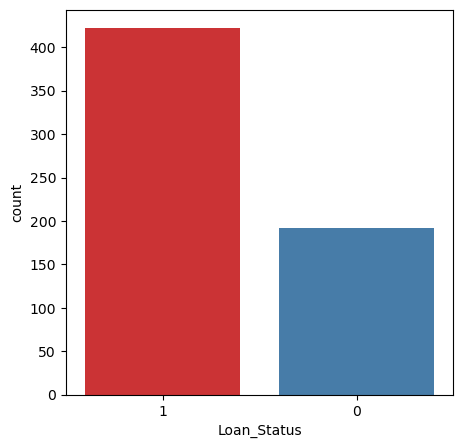

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(data= train_cleaned, x='Loan_Status', order =train_cleaned.Loan_Status.value_counts().index, palette='Set1')

# Machine Learning Models & Evaluation

### Train-Test Split

In [50]:
train_cleaned.drop('Loan_ID',axis=1, inplace = True)

In [51]:
y = train_cleaned["Loan_Status"]
X = train_cleaned.drop("Loan_Status",axis = 1)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 35)

## 1. Logistic Regression

In [54]:
lr_model = LogisticRegression()
lr_model.fit(X,y)

LogisticRegression()

In [55]:
lr_pred = lr_model.predict(X_test)

In [56]:
print('Accuracy:', accuracy_score(y_test, lr_pred))
print('Precision:', precision_score(y_test, lr_pred, average='macro'))
print('Recall:', recall_score(y_test, lr_pred, average='macro'))
print('F1 Score:', f1_score(y_test, lr_pred, average='macro'))

Accuracy: 0.8211382113821138
Precision: 0.9017857142857143
Recall: 0.6666666666666666
F1 Score: 0.6955445544554455


In [57]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        33
           1       0.80      1.00      0.89        90

    accuracy                           0.82       123
   macro avg       0.90      0.67      0.70       123
weighted avg       0.86      0.82      0.79       123



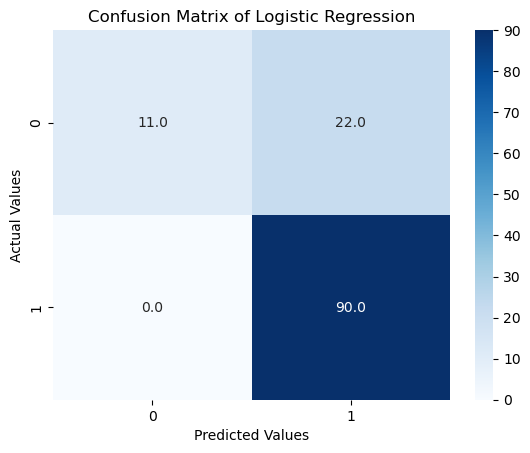

In [58]:
cm1= confusion_matrix(y_test,lr_pred)
ax = sns.heatmap(cm1, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of Logistic Regression')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

## 2. KNN

In [60]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [61]:
print('accuracy:',accuracy_score(y_test,knn_pred,))
print('precision:',precision_score(y_test,knn_pred,average='macro'))
print('recall:',recall_score(y_test,knn_pred,average='macro'))
print('f1_score:',f1_score(y_test,knn_pred,average='macro'))

accuracy: 0.8130081300813008
precision: 0.8322411533420708
recall: 0.6707070707070707
f1_score: 0.6975302042125522


In [62]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.36      0.51        33
           1       0.81      0.98      0.88        90

    accuracy                           0.81       123
   macro avg       0.83      0.67      0.70       123
weighted avg       0.82      0.81      0.78       123



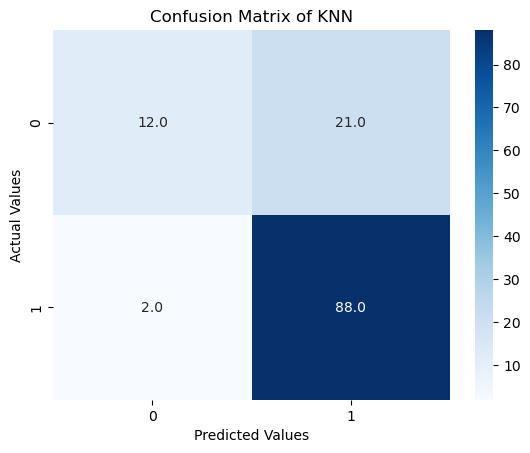

In [63]:
cm2 = confusion_matrix(y_test,knn_pred)
ax = sns.heatmap(cm2, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of KNN')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

## 3. Decision Tree

In [65]:
dt = DecisionTreeClassifier(random_state = 60)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [66]:
print('accuracy:',accuracy_score(y_test,dt_pred,))
print('precision:',precision_score (y_test, dt_pred,average='macro'))
print('recall:',recall_score(y_test, dt_pred,average='macro'))
print('f1_score:',f1_score(y_test, dt_pred,average='macro'))

accuracy: 0.7398373983739838
precision: 0.6656732117812061
recall: 0.6590909090909092
f1_score: 0.6620879120879121


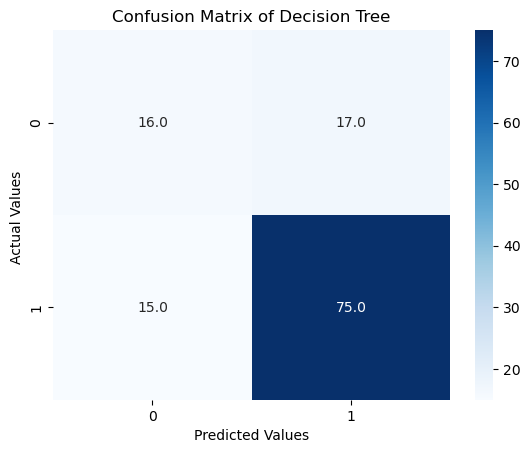

In [67]:
cm3 = confusion_matrix(y_test, dt_pred)
ax = sns.heatmap(cm3, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of Decision Tree')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

## 4. Random Forest


In [69]:
rf = RandomForestClassifier(random_state = 60) 
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [70]:
print('accuracy:',accuracy_score(y_test,rf_pred,))
print('precision:',precision_score( y_test,rf_pred,average='macro'))
print('recall:',recall_score(y_test,rf_pred,average='macro'))
print('f1_score:',f1_score(y_test,rf_pred,average='macro'))

accuracy: 0.8130081300813008
precision: 0.787621359223301
recall: 0.6994949494949495
f1_score: 0.723433375696549


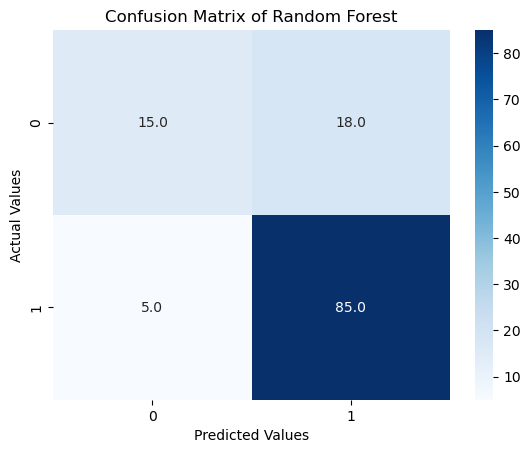

In [71]:
cm4 = confusion_matrix(y_test, rf_pred)
ax = sns.heatmap(cm4, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of Random Forest')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

### Insights
- In this case we need to identify both all eligible customers (high recall) and also  avoid offering loans to ineligible customers (minimizing false positives with high precision).Thus here F1 Score would be a good overall measure.
- Accuracy can be misleading since the dataset is imbalanced, as the model can achieve high accuracy by simply predicting the majority class.
- Random Forest is the best algorithm based on F1 Score of 72.34% , making it the most suitable for the loan eligibility prediction task. It provides a good balance between identifying eligible customers and minimizing false positives.

# Preprocessing on Test data

In [74]:
test_data = pd.read_csv("C:\\Users\\sachi\\Downloads\\test_lAUu6dG.csv")

In [75]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [76]:
test_data.shape

(367, 12)

In [77]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### Duplicate Removal

In [79]:
# checking duplicate rows
test_data.duplicated().sum()

0

In [80]:
# checking duplicate columns
test_data.columns.duplicated().sum()

0

### Handling Missing values

In [82]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [83]:
test_data.isna().sum()/test_data.shape[0]*100 # missing values in percentage

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [84]:
# splitting Numerical and Categorical Columns
test_num_df = test_data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]] # numerical columns
test_cat_df = test_data[["Loan_ID","Gender", "Married" , "Dependents", "Education", "Self_Employed" , "Credit_History", "Property_Area"]] # categorical columns

In [85]:
print ("Numerical columns are")
num_cols = test_num_df.columns.tolist()
print(num_cols)

Numerical columns are
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [86]:
print ("Categorical columns are")
cat_cols = test_cat_df.columns.tolist()
print(cat_cols)

Categorical columns are
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


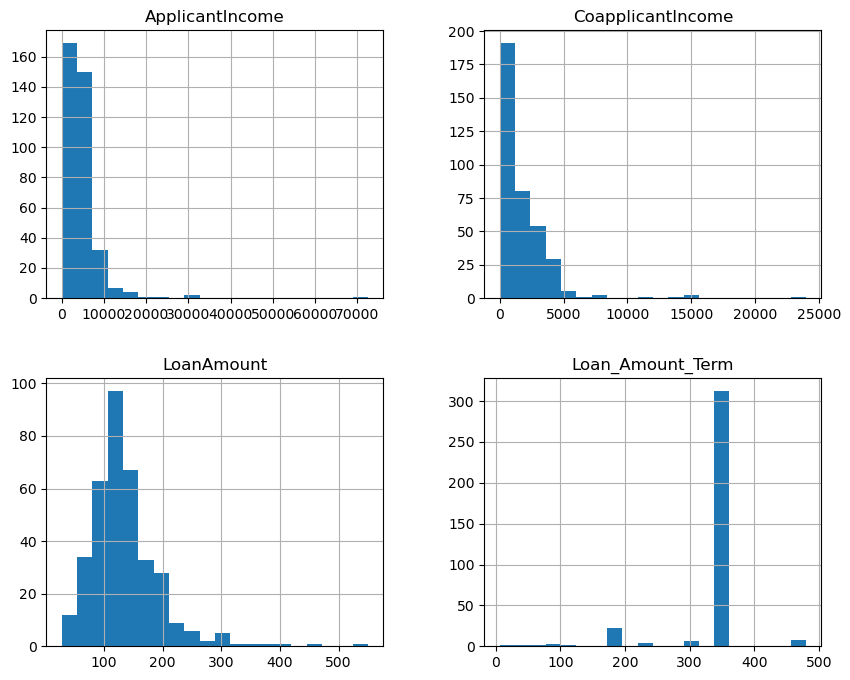

In [87]:
test_num_df.hist(figsize =(10,8), bins= 20)
plt.show()

In [88]:
#Filling missing values for numerical columns
for col in num_cols:                                
    test_num_df[col] = test_num_df[col].fillna(test_num_df[col].median())

In [89]:
test_num_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [90]:
#Filling missing values for categorical columns
for col in cat_cols:                                
    test_cat_df[col] = test_cat_df[col].fillna(test_cat_df[col].mode()[0])


In [91]:
test_cat_df.isna().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
dtype: int64

### Encoding Categorical Variables

In [93]:
test_cat_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban


In [94]:
label_enc = LabelEncoder()
label_columns = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Credit_History"]
for col in label_columns:
    test_cat_df[col] = label_enc.fit_transform(test_cat_df[col])

In [95]:
test_cat_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,1,2
1,LP001022,1,1,1,0,0,1,2
2,LP001031,1,1,2,0,0,1,2
3,LP001035,1,1,2,0,0,1,2
4,LP001051,1,0,0,1,0,1,2


### Outlier Handling

In [97]:
test_num_df.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720,0,110.0,360.0
1,3076,1500,126.0,360.0
2,5000,1800,208.0,360.0


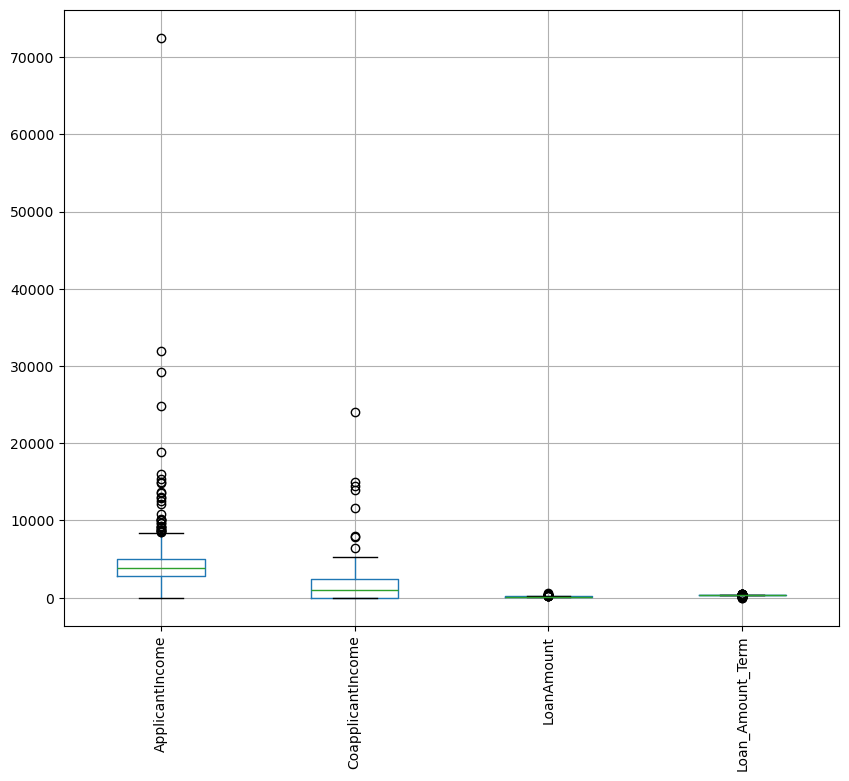

In [98]:
test_num_df.boxplot(figsize=(10,8))
plt.xticks(rotation = 90)
plt.show()

In [99]:
def remove_outliers(test_num_df, column_name):
    q1 = test_num_df[column_name].quantile(0.25)
    q3 = test_num_df[column_name].quantile(0.75)
    iqr = q3- q1
    upper_bound =q3+1.5*iqr
    lower_bound =q1-1.5*iqr
    test_num_df[column_name] = test_num_df [column_name].clip(upper = upper_bound)
    test_num_df[column_name] = test_num_df [column_name].clip(lower = lower_bound)
    return test_num_df[column_name]
for col in num_cols:
    test_num_df[col] = remove_outliers(test_num_df, col)

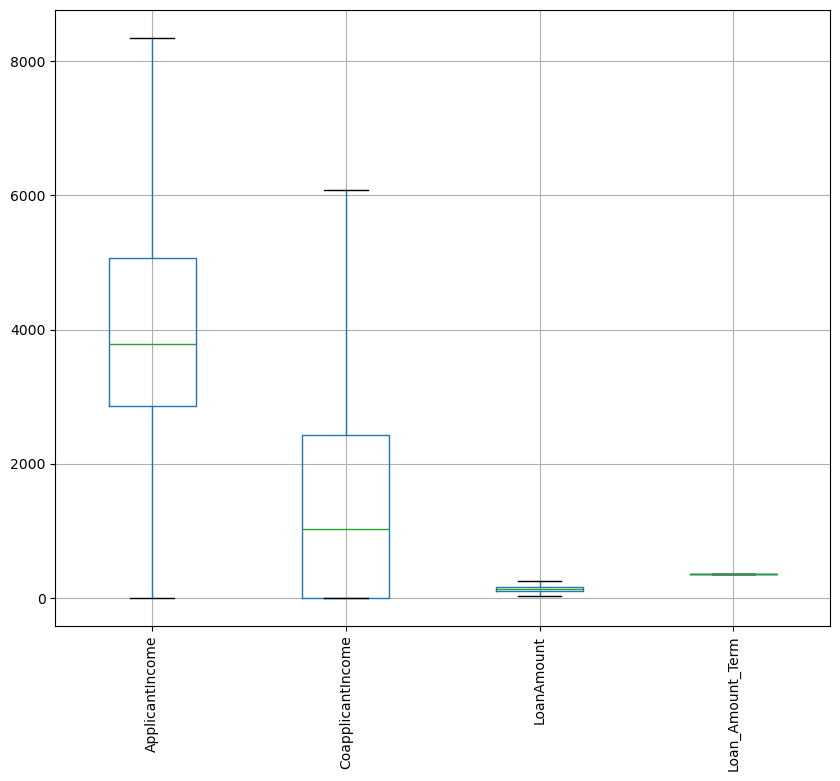

In [100]:
test_num_df.boxplot(figsize=(10,8))
plt.xticks(rotation = 90)
plt.show()

### Scaling Numerical Variables¶

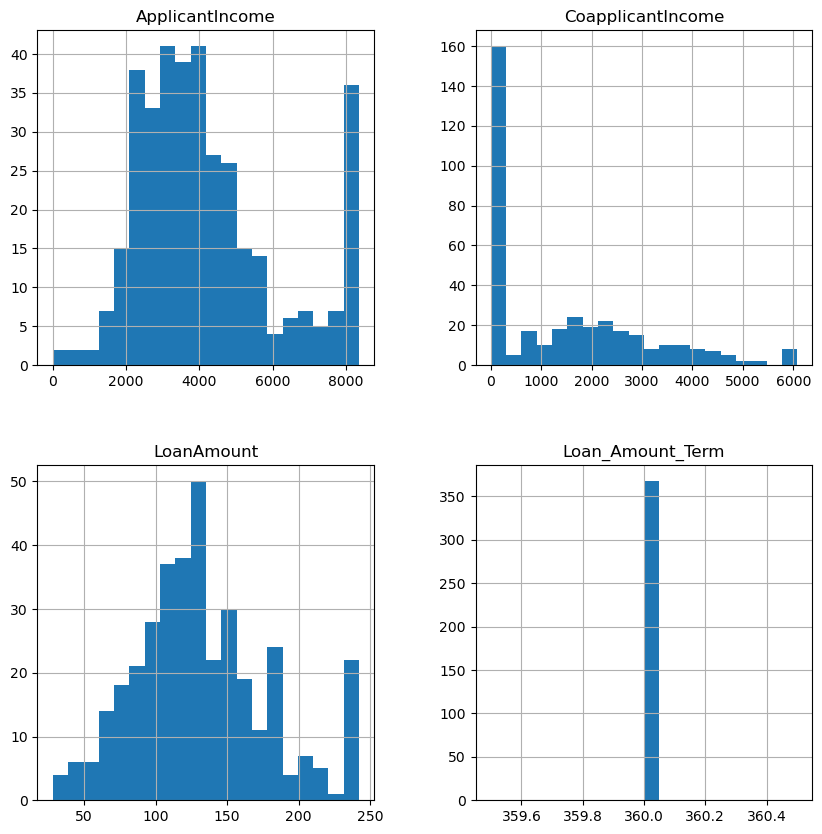

In [102]:
test_num_df.hist(bins=20, figsize= (10,10))
plt.show()

In [103]:
# Identify columns to scale
right_skewed_cols = ["CoapplicantIncome"]
symmetric_cols = ["LoanAmount", "ApplicantIncome"]
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply log transformation for skewed columns to reduce skewness
for col in right_skewed_cols:
    test_num_df[col] = np.log1p(test_num_df[col])

# Apply MinMaxScaler for skewed columns
test_num_df[right_skewed_cols] = min_max_scaler.fit_transform(test_num_df[right_skewed_cols])

# Apply StandardScaler for symmetric columns
test_num_df[symmetric_cols] = standard_scaler.fit_transform(test_num_df[symmetric_cols])

print("Scaling complete. Scaled data:")
print(test_num_df.head())

Scaling complete. Scaled data:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0         0.760162           0.000000   -0.468560             360.0
1        -0.596907           0.839489   -0.127134             360.0
2         0.390612           0.860403    1.622677             360.0
3        -0.974669           0.900183   -0.681952             360.0
4        -0.494255           0.000000   -1.151413             360.0


In [104]:
test_cleaned = pd.concat([test_cat_df, test_num_df], axis=1) # combining scaled and encoded data frames
test_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001015,1,1,0,0,0,1,2,0.760162,0.000000,-0.468560,360.0
1,LP001022,1,1,1,0,0,1,2,-0.596907,0.839489,-0.127134,360.0
2,LP001031,1,1,2,0,0,1,2,0.390612,0.860403,1.622677,360.0
3,LP001035,1,1,2,0,0,1,2,-0.974669,0.900183,-0.681952,360.0
4,LP001051,1,0,0,1,0,1,2,-0.494255,0.000000,-1.151413,360.0


In [105]:
test_cleaned.drop("Loan_ID", axis =1 ,inplace =True) #prediction loan status using Random forest

# Prediction

In [107]:
test_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,0,0,0,1,2,0.760162,0.000000,-0.468560,360.0
1,1,1,1,0,0,1,2,-0.596907,0.839489,-0.127134,360.0
2,1,1,2,0,0,1,2,0.390612,0.860403,1.622677,360.0
3,1,1,2,0,0,1,2,-0.974669,0.900183,-0.681952,360.0
4,1,0,0,1,0,1,2,-0.494255,0.000000,-1.151413,360.0


In [108]:
test_cleaned["Loan_Status"] = rf.predict(test_cleaned)

In [109]:
test_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,1,0,0,0,1,2,0.760162,0.000000,-0.468560,360.0,1
1,1,1,1,0,0,1,2,-0.596907,0.839489,-0.127134,360.0,1
2,1,1,2,0,0,1,2,0.390612,0.860403,1.622677,360.0,0
3,1,1,2,0,0,1,2,-0.974669,0.900183,-0.681952,360.0,1
4,1,0,0,1,0,1,2,-0.494255,0.000000,-1.151413,360.0,0


In [110]:
test_cleaned["Loan_Status"].value_counts()

Loan_Status
1    267
0    100
Name: count, dtype: int64

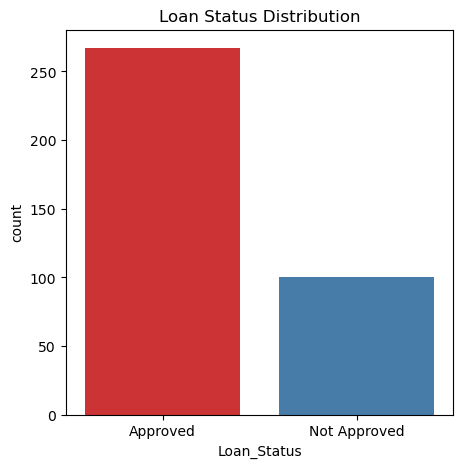

In [111]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=test_cleaned, x='Loan_Status', order=test_cleaned['Loan_Status'].value_counts().index, palette='Set1')
ax.set_xticklabels(['Approved', 'Not Approved'], rotation=0)
plt.title("Loan Status Distribution")
plt.show()

In [112]:
test_loan_status= test_cleaned["Loan_Status"]

In [113]:
df = pd.read_csv("C:\\Users\\sachi\\Downloads\\test_lAUu6dG.csv")
Id_df = df["Loan_ID"]

In [114]:
test_pred= pd.concat([Id_df, test_loan_status], axis=1)

In [115]:
test_pred.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,0
3,LP001035,1
4,LP001051,0


In [116]:
test_pred['Loan_Status'] = test_pred['Loan_Status'].replace({1: 'Y', 0: 'N'}) #converting Loan_Status to Yes or No format

In [117]:
test_pred.head(3) 

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,N


In [118]:
test_pred.shape

(367, 2)

In [119]:
test_pred.to_csv("C:\\Users\\sachi\\Downloads\\test_pred_loan_status.csv", index=False) #saving predicted dataset

## Conclusion
- The loan prediction task is performed on test data using Random Forest Classifier.
- According to the prediction, 267 loans are approved and 100 loans are rejected.